In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from scipy import ndimage

from keras.utils import to_categorical
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


Using TensorFlow backend.
C:\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


---

In [3]:
model = load_model("cnn_gems.h5")

In [8]:
img_datagen = ImageDataGenerator(rescale=1/255,  
                   rotation_range=45,
                   horizontal_flip=True,
                   vertical_flip=True, 
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   )

img_generator = img_datagen.flow_from_directory(
    './data/train',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 2801 images belonging to 87 classes.


In [15]:
img = 1/255 * cv.cvtColor(cv.resize(cv.imread("test.jpg"), (224, 224)), cv.COLOR_BGR2RGB)

<BarContainer object of 87 artists>

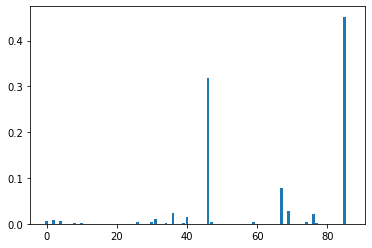

In [16]:
pred = model.predict(np.expand_dims(img, 0))[0]
plt.bar(np.arange(87), pred)

In [17]:
for i in reversed(np.argsort(pred)[-6:]):
    print("{0} => {1:.2f}%".format(list(img_generator.class_indices)[i], 100 * pred[i]))

Zircon => 45.23%
Moonstone => 31.86%
Sapphire Pink => 7.82%
Sapphire Yellow => 2.85%
Hiddenite => 2.40%
Spodumene => 2.10%
